In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import math

pd.set_option("display.min_rows", 20)

In [2]:
main_df = pd.read_json('../fediverse-stats.txt', orient='records', lines=True)
main_df

,endpoint,checked_target,result
0,https://ff.mizunashi.work/,ff.mizunashi.work,"{'type': 'ok', 'node_info': {'resource_type': ..."
1,https://atsuchan.page/,atsuchan.page,"{'type': 'ok', 'node_info': {'resource_type': ..."
2,https://m.huling.org/,m.huling.org,"{'type': 'ok', 'node_info': {'resource_type': ..."
3,https://lightcrystal.fedicity.net/,lightcrystal.fedicity.net,"{'type': 'ok', 'node_info': {'resource_type': ..."
4,https://social.wake.st/,social.wake.st,"{'type': 'ok', 'node_info': {'resource_type': ..."
5,https://a.gup.pe/,a.gup.pe,"{'type': 'ok', 'node_info': {'resource_type': ..."
6,https://labo.nora.social/,labo.nora.social,"{'type': 'ok', 'node_info': {'resource_type': ..."
7,https://gyudon.org/,gyudon.org,"{'type': 'ok', 'node_info': {'resource_type': ..."
8,https://floss.social/,floss.social,"{'type': 'fail', 'resource_status': 'unknown',..."
9,https://be-lieve.hostdon.ne.jp/,be-lieve.hostdon.ne.jp,"{'type': 'ok', 'node_info': {'resource_type': ..."


In [3]:
result_df = pd.json_normalize(main_df['result'])
result_df

,type,peers_count,node_info.resource_type,node_info.resource_url,node_info.node_name,node_info.protocols,node_info.services_inbound,node_info.services_outbound,node_info.software_name,node_info.software_version,...,node_info.maintainer_name,node_info.open_registrations,node_info.email_required_for_signup,node_info.enable_email,node_info.enable_hcaptcha,node_info.enable_recaptcha,node_info.langs,node_info.max_note_text_length,resource_status,detail
0,ok,1793.0,http://nodeinfo.diaspora.software/ns/schema/2.1,https://ff.mizunashi.work/nodeinfo/2.1,Mizunashi Social,[activitypub],[],"[atom1.0, rss2.0]",firefish,1.0.4-beta31,...,Mizunashi Mana,False,False,True,False,True,[],3000.0,NaN,NaN
1,ok,NaN,http://nodeinfo.diaspora.software/ns/schema/2.0,https://atsuchan.page/nodeinfo/2.0,NaN,[activitypub],NaN,NaN,mastodon,3.4.10+glitch+atsu1125,...,maintenance,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ok,1071.0,http://nodeinfo.diaspora.software/ns/schema/2.1,https://m.huling.org/nodeinfo/2.1,Huling 鯖,[activitypub],[],"[atom1.0, rss2.0]",misskey,2023.11.0-poskey-e150ee7,...,xiupos,False,False,False,False,False,[],3000.0,NaN,NaN
3,ok,1551.0,http://nodeinfo.diaspora.software/ns/schema/2.0,https://lightcrystal.fedicity.net/nodeinfo/2.0,NaN,[activitypub],[],[],mastodon,4.2.1,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ok,29521.0,http://nodeinfo.diaspora.software/ns/schema/2.0,https://social.wake.st/nodeinfo/2.0,NaN,[activitypub],[],[],mastodon,4.2.1,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ok,NaN,http://nodeinfo.diaspora.software/ns/schema/2.1,https://a.gup.pe/nodeinfo/2.1,NaN,[activitypub],[],[],Guppe Groups,1.5.2,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ok,126.0,http://nodeinfo.diaspora.software/ns/schema/2.0,https://labo.nora.social/nodeinfo/2.0,NaN,[activitypub],[],[],mastodon,4.2.1,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ok,813.0,http://nodeinfo.diaspora.software/ns/schema/2.0,https://gyudon.org/nodeinfo/2.0,NaN,[activitypub],[],[],mastodon,4.2.1,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,Failed to fetch https://floss.social/.well-kno...
9,ok,2085.0,http://nodeinfo.diaspora.software/ns/schema/2.0,https://be-lieve.hostdon.ne.jp/nodeinfo/2.0,NaN,[activitypub],[],[],mastodon,4.2.1,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = pd.DataFrame(result_df, columns=['type'])
df.loc[:, 'total'] = 1
df = df.pivot_table(index=['type'], aggfunc='count', values=['total'], margins=True)
df.loc[:, '%'] = (df['total'] / df.loc['All', 'total']) * 100
df.style.set_caption("Instances by Result Types")

,total,%
type,,
fail,57010,70.248290
ok,24145,29.751710
All,81155,100.000000


In [5]:
def detect_detail_kind(detail):
    if type(detail) is not str:
        return detail
    elif re.match(r'.* getaddrinfo ENOTFOUND ', detail):
        return 'Addr not found'
    elif re.match(r'.*/.well-known/nodeinfo: the resource is not available\.', detail):
        return '/.well-known/nodeinfo not found'
    elif re.match(r'.* timeout of [0-9]+ms exceeded', detail):
        return 'Timeout'
    elif re.match(r'.*(,| )(connect ENETUNREACH|connect EHOSTUNREACH)', detail):
        return 'Connection unreachable'
    elif re.match(r'.* (self-signed certificate|Hostname/IP does not match certificate\'s altnames|certificate has expired|unable to verify the first certificate|unable to get local issuer certificate)', detail):
        return 'TLS certificate is invalid'
    elif re.match(r'.* invalid status=(302|401|402|403|406|418|420|423|429|451|5[0-9]+|999)', detail):
        return 'Invalid HTTP status'
    elif re.match(r'.*(,| )connect ECONNREFUSED', detail):
        return 'Connection refused'
    elif re.match(r'.*/.well-known/nodeinfo: invalid schema.|JSON resources are not available on .*/.well-known/nodeinfo.', detail):
        return '/.well-known/nodeinfo invalid'
    elif re.match(r'.*:SSL routines:.*(:SSL alert number [0-9]+|:wrong version number|:unsupported protocol)', detail):
        return 'Not supported TLS'
    elif re.match(r'.*/.well-known/nodeinfo: the resource is gone\.', detail):
        return '/.well-known/nodeinfo gone'
    elif re.match(r'.* getaddrinfo EAI_AGAIN', detail):
        return 'Failed to resolve addr'
    elif re.match(r'.* Client network socket disconnected before secure TLS connection was established', detail):
        return 'Failed to handshake TLS sessions'
    elif re.match(r'.* (socket hang up|read ECONNRESET)', detail):
        return 'Connection cancelled'
    elif re.match(r'.*(,| )connect EINVAL', detail):
        return 'Connection invalid'
    elif re.match(r'.* Maximum number of redirects exceeded', detail):
        return 'Too many redirections'
    elif re.match(r'.* Parse Error', detail):
        return 'Not supported HTTP'
    else:
        return '_'

df = pd.DataFrame(result_df, columns=['type', 'resource_status', 'detail'])
df.loc[:, 'detail_kind'] = df['detail'].apply(detect_detail_kind)  
df.loc[:, 'total'] = 1
pivot_df = df.pivot_table(index=['type', 'detail_kind'], values=['total'], aggfunc='count').sort_values(by=['total'], ascending=False)
pivot_df.loc['All', 'total'] = pivot_df['total'].sum()
pivot_df.loc[:, '%'] = (pivot_df['total'] / pivot_df.loc['All', 'total'].iloc[0]) * 100
#df[(df['type']=='fail')&(df['detail_kind']=='_')]

pivot_df.style.set_caption("Instances by Failure Reasons to Fetch")

In [6]:
df = pd.DataFrame(result_df[result_df['type']=='ok'])
df = df.pivot_table(index='node_info.resource_type', values=[
    'node_info.resource_url', 
    'peers_count', 
    'node_info.users_total', 
    'node_info.users_active_month', 
    'node_info.users_active_half_year', 
    'node_info.local_posts_total',
    'node_info.local_comments_total',
    'node_info.open_registrations',
    'node_info.software_name',
    'node_info.software_version',
    'node_info.software_repository',
    'node_info.node_name',
    'node_info.max_note_text_length'
], aggfunc='count').rename(columns={
    'node_info.resource_url':'total',
})
df.loc['All'] = df.sum()
df = df.transpose()
df.loc[:, '%'] = (df.loc[:, 'All'] / df.loc[:, 'All']['total']) * 100
df.sort_values(by='All').rename(columns={
    'http://nodeinfo.diaspora.software/ns/schema/1.0':'nodeinfo/1.0',
    'http://nodeinfo.diaspora.software/ns/schema/2.0':'nodeinfo/2.0',
    'http://nodeinfo.diaspora.software/ns/schema/2.1':'nodeinfo/2.1'
}).style.set_caption("Instances Supported Features")

node_info.resource_type,nodeinfo/1.0,nodeinfo/2.0,nodeinfo/2.1,All,%
node_info.max_note_text_length,0,536,1391,1927,7.980948
node_info.software_repository,0,5,2156,2161,8.950093
node_info.node_name,387,5276,1445,7108,29.438807
node_info.local_comments_total,118,6097,2182,8397,34.777387
peers_count,355,14028,1509,15892,65.819010
node_info.users_active_month,119,16972,1014,18105,74.984469
node_info.users_active_half_year,119,17069,1018,18206,75.402775
node_info.local_posts_total,119,20808,2285,23212,96.135846
node_info.users_total,119,21000,2366,23485,97.266515
node_info.software_version,388,21373,2366,24127,99.925450


In [7]:
result_df[(result_df['type']=='ok')&result_df['peers_count'].isna()].pivot_table(
    index='node_info.software_name',
    values='node_info.resource_url', 
    aggfunc='count', 
    fill_value=0
).rename(columns={
    'node_info.resource_url':'instances_total'
}).sort_values(by='instances_total', ascending=False).head(20).style.set_caption('Top Softwares not Supported Peers API by Instances')

,instances_total
node_info.software_name,
wordpress,2757
peertube,1271
writefreely,702
gotosocial,679
mastodon,590
pixelfed,528
owncast,267
funkwhale,153
Mobilizon,129


In [8]:
raw_ok_df = result_df[result_df['type']=='ok'].rename(columns={
    'node_info.users_total':'users_total',
    'node_info.users_active_month':'users_active_month',
    'node_info.users_active_half_year':'users_active_half_year',
    'node_info.local_posts_total':'local_posts_total',
    'node_info.local_comments_total':'local_comments_total',
    'node_info.open_registrations':'open_registrations',
    'node_info.software_name':'software_name',
    'node_info.software_version':'software_version',
    'node_info.node_name':'name'
})
raw_ok_df.loc[:, 'instances_total'] = 1
raw_ok_df[[
    'node_info.resource_url',
    'name',
    'software_name',
    'software_version',
    'users_total',
    'users_active_half_year',
    'users_active_month',
    'peers_count'
]].sort_values(by='users_total',ascending=False).head(20).style.set_caption('Top Instances by Users')

,node_info.resource_url,name,software_name,software_version,users_total,users_active_half_year,users_active_month,peers_count
10568,https://egirls.gay/nodeinfo/2.0,eGirls Dot Gay,misskey,12.91.0+egirls.4,1234567890.000000,nan,nan,2619.000000
1595,https://mastodon.social/nodeinfo/2.0,nan,mastodon,4.2.1+pr-27634-22407c7,1714687.000000,838498.000000,263751.000000,65311.000000
44024,https://alien.top/nodeinfo/2.0.json,nan,lemmy,0.18.5,1017417.000000,9.000000,7.000000,662.000000
1151,https://pawoo.net/nodeinfo/2.0,nan,mastodon,4.1.6,926660.000000,72597.000000,37716.000000,38215.000000
55708,https://daystorm.netz.org/nodeinfo/2.0,nan,mastodon,4.1.2,479002.000000,479004.000000,479003.000000,nan
1787,https://misskey.io/nodeinfo/2.1,Misskey.io,misskey,2023.11.1-io.3a,415920.000000,nan,nan,22594.000000
1409,https://mstdn.jp/nodeinfo/2.0,nan,mastodon,4.1.10,403190.000000,119673.000000,32042.000000,61614.000000
129,https://baraag.net/nodeinfo/2.0,nan,mastodon,4.2.1,293105.000000,73647.000000,45714.000000,27426.000000
739,https://mastodon.cloud/nodeinfo/2.0,nan,mastodon,4.1.10,273556.000000,27872.000000,3976.000000,49046.000000
18820,https://pravda.me/nodeinfo/2.0,nan,mastodon,4.1.6,228880.000000,191611.000000,36.000000,5994.000000


In [9]:
blacklist = [
    'https://egirls.gay/nodeinfo/2.0',
    'https://daystorm.netz.org/nodeinfo/2.0',
]
raw_ok_df[raw_ok_df['node_info.resource_url'].isin(blacklist)][[
    'name',
    'node_info.resource_type',
    'node_info.resource_url',
    'software_name',
    'software_version',
    'users_total',
    'users_active_half_year',
    'users_active_month',
    'local_posts_total',
    'local_comments_total',
    'peers_count'
]].style.set_caption('Ignored Noisy Instances')

,name,node_info.resource_type,node_info.resource_url,software_name,software_version,users_total,users_active_half_year,users_active_month,local_posts_total,local_comments_total,peers_count
10568,eGirls Dot Gay,http://nodeinfo.diaspora.software/ns/schema/2.0,https://egirls.gay/nodeinfo/2.0,misskey,12.91.0+egirls.4,1234567890.000000,nan,nan,696942069.000000,696942069.000000,2619.000000
55708,nan,http://nodeinfo.diaspora.software/ns/schema/2.0,https://daystorm.netz.org/nodeinfo/2.0,mastodon,4.1.2,479002.000000,479004.000000,479003.000000,20.000000,nan,nan


In [10]:
ok_df = raw_ok_df[~raw_ok_df['node_info.resource_url'].isin(blacklist)]
ok_df

,type,peers_count,node_info.resource_type,node_info.resource_url,name,node_info.protocols,node_info.services_inbound,node_info.services_outbound,software_name,software_version,...,open_registrations,node_info.email_required_for_signup,node_info.enable_email,node_info.enable_hcaptcha,node_info.enable_recaptcha,node_info.langs,node_info.max_note_text_length,resource_status,detail,instances_total
0,ok,1793.0,http://nodeinfo.diaspora.software/ns/schema/2.1,https://ff.mizunashi.work/nodeinfo/2.1,Mizunashi Social,[activitypub],[],"[atom1.0, rss2.0]",firefish,1.0.4-beta31,...,False,False,True,False,True,[],3000.0,NaN,NaN,1
1,ok,NaN,http://nodeinfo.diaspora.software/ns/schema/2.0,https://atsuchan.page/nodeinfo/2.0,NaN,[activitypub],NaN,NaN,mastodon,3.4.10+glitch+atsu1125,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,ok,1071.0,http://nodeinfo.diaspora.software/ns/schema/2.1,https://m.huling.org/nodeinfo/2.1,Huling 鯖,[activitypub],[],"[atom1.0, rss2.0]",misskey,2023.11.0-poskey-e150ee7,...,False,False,False,False,False,[],3000.0,NaN,NaN,1
3,ok,1551.0,http://nodeinfo.diaspora.software/ns/schema/2.0,https://lightcrystal.fedicity.net/nodeinfo/2.0,NaN,[activitypub],[],[],mastodon,4.2.1,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,ok,29521.0,http://nodeinfo.diaspora.software/ns/schema/2.0,https://social.wake.st/nodeinfo/2.0,NaN,[activitypub],[],[],mastodon,4.2.1,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,ok,NaN,http://nodeinfo.diaspora.software/ns/schema/2.1,https://a.gup.pe/nodeinfo/2.1,NaN,[activitypub],[],[],Guppe Groups,1.5.2,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,ok,126.0,http://nodeinfo.diaspora.software/ns/schema/2.0,https://labo.nora.social/nodeinfo/2.0,NaN,[activitypub],[],[],mastodon,4.2.1,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,ok,813.0,http://nodeinfo.diaspora.software/ns/schema/2.0,https://gyudon.org/nodeinfo/2.0,NaN,[activitypub],[],[],mastodon,4.2.1,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,ok,2085.0,http://nodeinfo.diaspora.software/ns/schema/2.0,https://be-lieve.hostdon.ne.jp/nodeinfo/2.0,NaN,[activitypub],[],[],mastodon,4.2.1,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,ok,NaN,http://nodeinfo.diaspora.software/ns/schema/2.0,https://public-api.wordpress.com/wpcom/activit...,NaN,[activitypub],[],[],wordpress,6.4.1-RC1-57094,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [11]:
pd.DataFrame(
    ok_df.loc[:, [
        'instances_total',
        'users_total', 
        'users_active_half_year', 
        'users_active_month', 
        'local_posts_total', 
        'local_comments_total'
    ]].sum().astype(int),
    columns=['total']
)

,total
instances_total,24143
users_total,12619488
users_active_half_year,3216338
users_active_month,1184748
local_posts_total,1239806099
local_comments_total,26717840


<Axes: title={'center': 'Users Percentiles by Instances'}, xlabel='instances_percent', ylabel='users_total'>

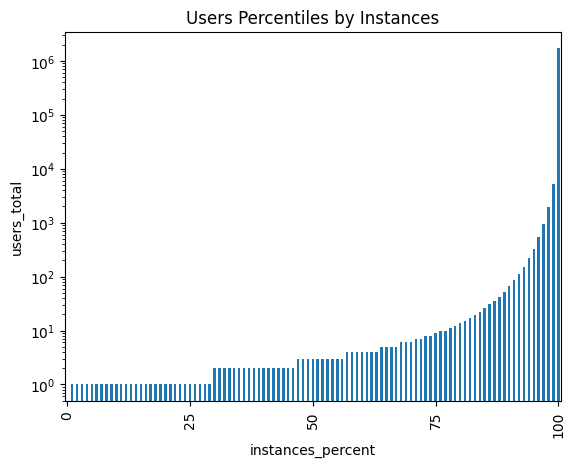

In [12]:
df = ok_df[['users_total']].quantile(list(map(lambda x: x / 100, range(101))))
df.reset_index(inplace=True)
df = df.rename(columns={
    'index':'instances_ratio',
})
df['instances_percent'] = df['instances_ratio'] * 100
df.plot.bar(
    x='instances_percent', 
    y='users_total', 
    logy=True, 
    xticks=[0, 25, 50, 75, 100], 
    legend=False, 
    ylabel='users_total',
    title='Users Percentiles by Instances'
)

<Axes: title={'center': 'Posts Percentiles by Instances'}, xlabel='instances_percent', ylabel='local_posts_total'>

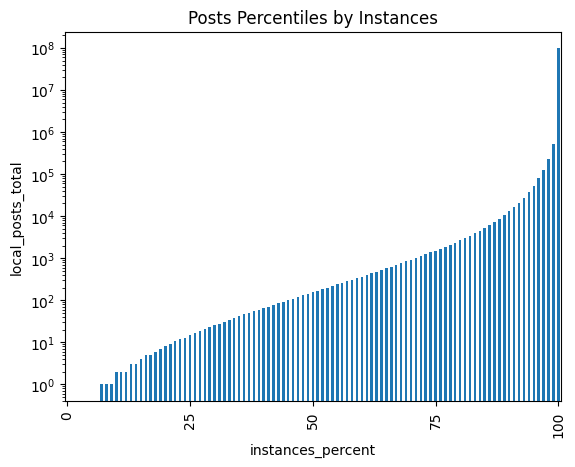

In [13]:
df = ok_df[['local_posts_total']].quantile(list(map(lambda x: x / 100, range(101))))
df.reset_index(inplace=True)
df = df.rename(columns={
    'index':'instances_ratio',
})
df['instances_percent'] = df['instances_ratio'] * 100
df.plot.bar(
    x='instances_percent',
    y='local_posts_total',
    logy=True,
    xticks=[0, 25, 50, 75, 100],
    legend=False,
    ylabel='local_posts_total',
    title='Posts Percentiles by Instances'
)

<Axes: title={'center': 'Peers Percentiles by Instances'}, xlabel='instances_percent', ylabel='peers_count'>

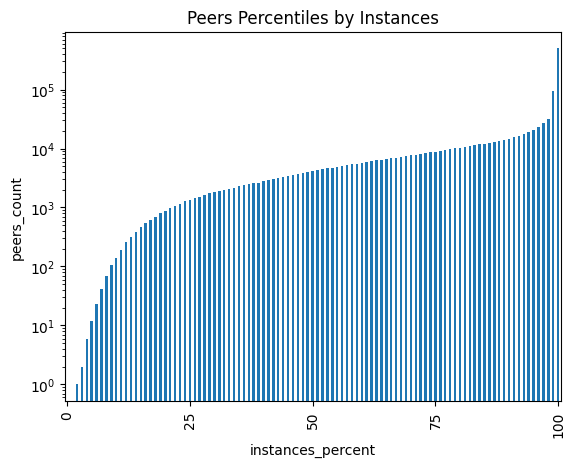

In [14]:
df = ok_df[['peers_count']].quantile(list(map(lambda x: x / 100, range(101))))
df.reset_index(inplace=True)
df = df.rename(columns={
    'index':'instances_ratio',
})
df['instances_percent'] = df['instances_ratio'] * 100
df.plot.bar(
    x='instances_percent', 
    y='peers_count', 
    logy=True, 
    xticks=[0, 25, 50, 75, 100], 
    legend=False, 
    ylabel='peers_count',
    title='Peers Percentiles by Instances'
)

<Axes: title={'center': 'Users Active Month Percentiles by Instances'}, xlabel='instances_percent', ylabel='users_active_month'>

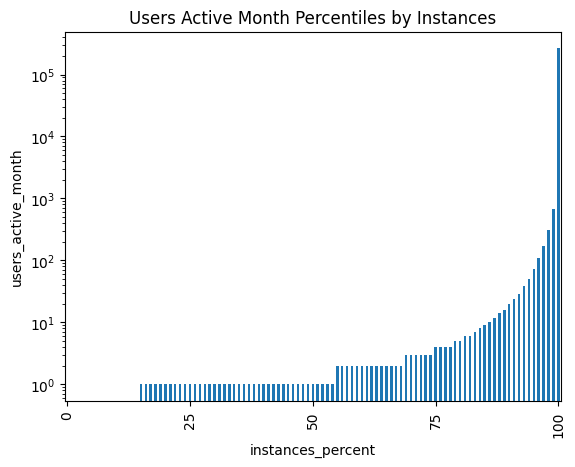

In [15]:
df = ok_df[['users_active_month']].quantile(list(map(lambda x: x / 100, range(101))))
df.reset_index(inplace=True)
df = df.rename(columns={
    'index':'instances_ratio',
})
df['instances_percent'] = df['instances_ratio'] * 100
df.plot.bar(
    x='instances_percent',
    y='users_active_month', 
    logy=True, 
    xticks=[0, 25, 50, 75, 100], 
    legend=False, 
    ylabel='users_active_month',
    title='Users Active Month Percentiles by Instances'
)

In [16]:
ok_df.pivot_table(index='software_name', values=[
    'instances_total',
    'users_total',
    'users_active_half_year', 
    'users_active_month', 
    'local_posts_total', 
    'local_comments_total'
], aggfunc='sum').sort_values(by=['instances_total'],ascending=False).head(20)

,instances_total,local_comments_total,local_posts_total,users_active_half_year,users_active_month,users_total
software_name,,,,,,
mastodon,10956,0.0,880454408.0,2760572.0,1032843.0,8221066.0
wordpress,2991,3107403.0,2628113.0,5052.0,5126.0,25928.0
peertube,1271,423016.0,23166673.0,78119.0,19951.0,331247.0
misskey,1233,0.0,115672438.0,11233.0,3222.0,685689.0
pleroma,1109,0.0,27914305.0,33326.0,16976.0,136646.0
lemmy,1014,12310543.0,6376048.0,115481.0,32706.0,1996648.0
gotosocial,711,0.0,682845.0,0.0,0.0,1300.0
writefreely,702,0.0,343761.0,14430.0,2949.0,78768.0
akkoma,573,0.0,4704864.0,6199.0,3112.0,14151.0


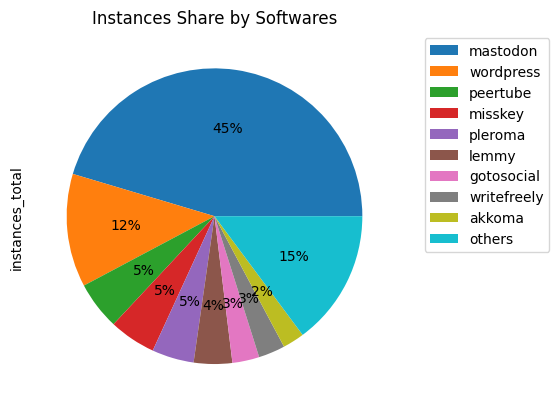

In [17]:
all_df = ok_df.pivot_table(index='software_name', values='instances_total', aggfunc='sum').sort_values(by='instances_total', ascending=False)
df = pd.DataFrame(all_df.head(9))
df.loc['others'] = all_df[9:].sum()
plot = df.plot.pie(y='instances_total', autopct='%.f%%', labeldistance=None, title='Instances Share by Softwares')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

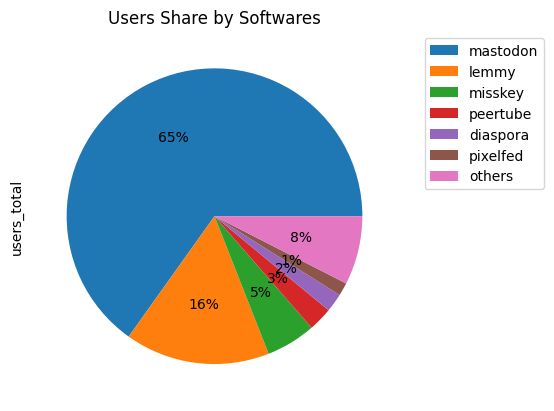

In [18]:
all_df = ok_df.pivot_table(index='software_name', values='users_total', aggfunc='sum').sort_values(by='users_total', ascending=False)
df = pd.DataFrame(all_df.head(6))
df.loc['others'] = all_df[6:].sum()
plot = df.plot.pie(y='users_total', autopct='%.f%%', labeldistance=None, title='Users Share by Softwares')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

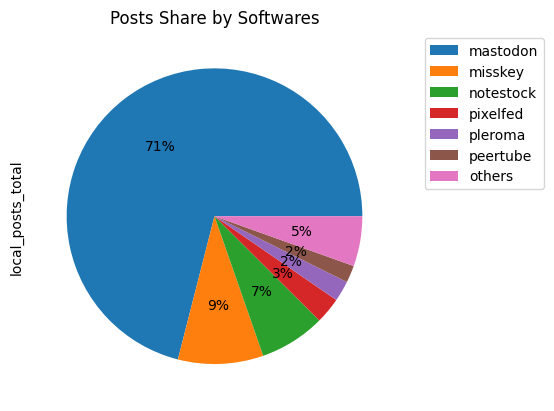

In [19]:
all_df = ok_df.pivot_table(index='software_name', values='local_posts_total', aggfunc='sum').sort_values(by='local_posts_total', ascending=False)
df = pd.DataFrame(all_df.head(6))
df.loc['others'] = all_df[6:].sum()
plot = df.plot.pie(y='local_posts_total', autopct='%.f%%', labeldistance=None, title='Posts Share by Softwares')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

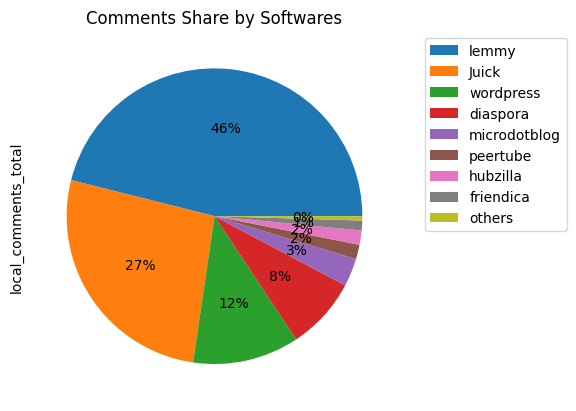

In [20]:
all_df = ok_df.pivot_table(index='software_name', values='local_comments_total', aggfunc='sum').sort_values(by='local_comments_total', ascending=False)
df = pd.DataFrame(all_df.head(8))
df.loc['others'] = all_df[8:].sum()
plot = df.plot.pie(y='local_comments_total', autopct='%.f%%', labeldistance=None, title='Comments Share by Softwares')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

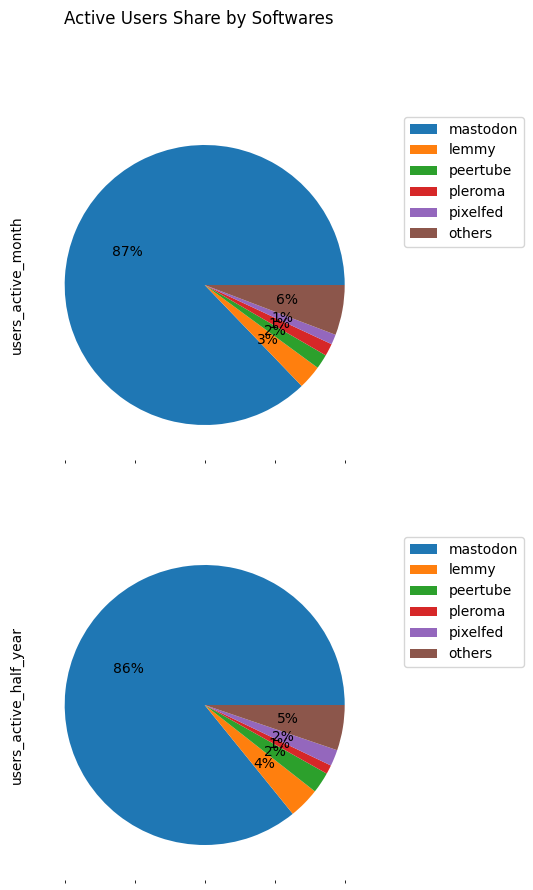

In [21]:
all_df = ok_df.pivot_table(index='software_name', values=[
    'users_active_month',
    'users_active_half_year'
], aggfunc='sum')[[
    'users_active_month',
    'users_active_half_year'
]].sort_values(by='users_active_month', ascending=False)
df = pd.DataFrame(all_df.head(5))
df.loc['others'] = all_df[5:].sum()
plots = df.plot.pie(subplots=True, autopct='%.f%%', labeldistance=None, layout=(2, 1), figsize=(5, 10), title='Active Users Share by Softwares')
for plot in plots:
    plot[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

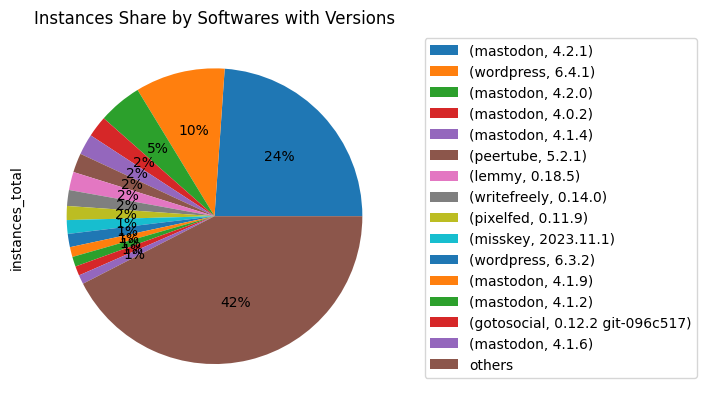

In [22]:
all_df = ok_df.pivot_table(index=['software_name', 'software_version'], values='instances_total', aggfunc='sum').sort_values(by='instances_total', ascending=False)
df = pd.DataFrame(all_df.head(15))
df.loc['others'] = all_df[15:].sum()
plot = df.plot.pie(y='instances_total', autopct='%.f%%', labeldistance=None, title='Instances Share by Softwares with Versions')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

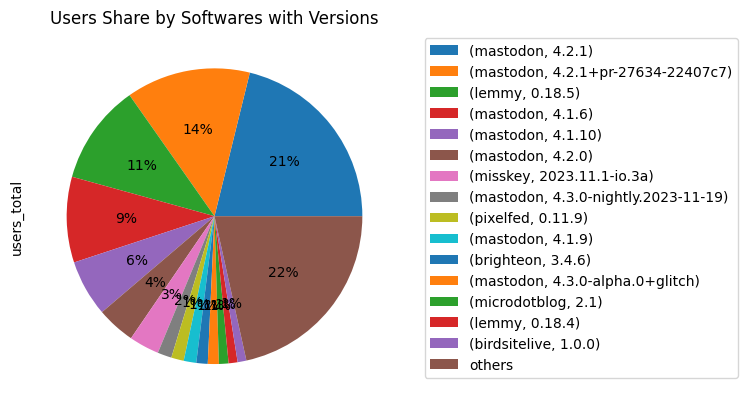

In [23]:
all_df = ok_df.pivot_table(index=['software_name', 'software_version'], values='users_total', aggfunc='sum').sort_values(by='users_total', ascending=False)
df = pd.DataFrame(all_df.head(15))
df.loc['others'] = all_df[15:].sum()
plot = df.plot.pie(y='users_total', autopct='%.f%%', labeldistance=None, title='Users Share by Softwares with Versions')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

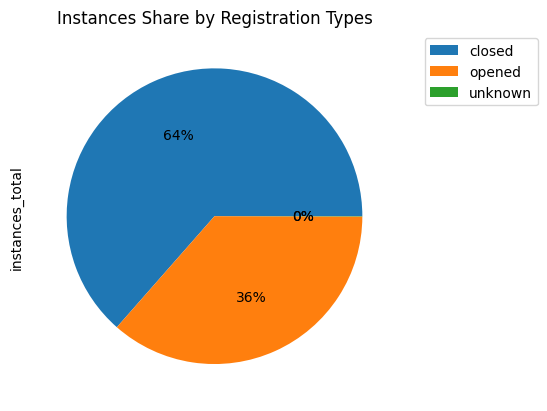

In [24]:
def registration_type(open_registrations):
    if type(open_registrations) is not bool:
        return 'unknown'
    elif open_registrations:
        return 'opened'
    else:
        return 'closed'

all_df = pd.DataFrame(ok_df)
all_df['registration_type'] = ok_df['open_registrations'].apply(registration_type)
all_df = all_df.pivot_table(
    index='registration_type',
    values='instances_total', 
    aggfunc='sum'
).sort_values(by='instances_total', ascending=False)
df = pd.DataFrame(all_df.head(9))
df.loc['others'] = all_df[9:].sum()
plot = df.plot.pie(y='instances_total', autopct='%.f%%', labeldistance=None, title='Instances Share by Registration Types')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

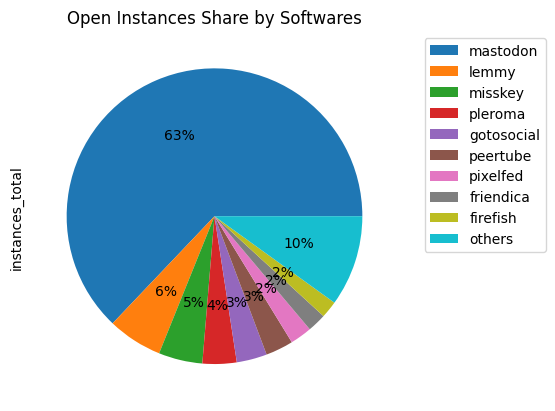

In [25]:
all_df = ok_df[ok_df['open_registrations'].fillna(False)].pivot_table(
    index='software_name', 
    values='instances_total', 
    aggfunc='sum'
).sort_values(by='instances_total', ascending=False)
df = pd.DataFrame(all_df.head(9))
df.loc['others'] = all_df[9:].sum()
plot = df.plot.pie(y='instances_total', autopct='%.f%%', labeldistance=None, title='Open Instances Share by Softwares')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

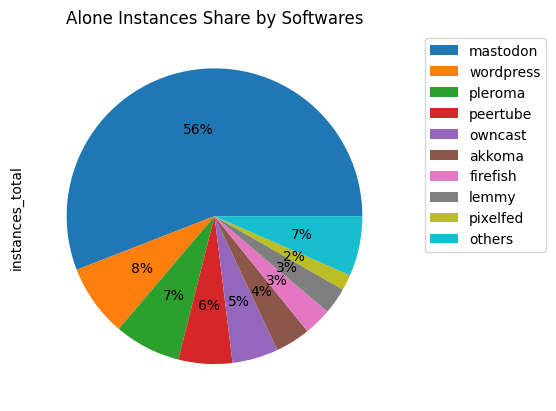

In [26]:
all_df = ok_df[(~ok_df['open_registrations'].fillna(False))&(ok_df['users_active_month']==1|(ok_df['users_active_month'].isna()&(ok_df['users_total'] <= 5)))].pivot_table(
    index='software_name', 
    values='instances_total', 
    aggfunc='sum'
).sort_values(by='instances_total', ascending=False)
df = pd.DataFrame(all_df.head(9))
df.loc['others'] = all_df[9:].sum()
plot = df.plot.pie(y='instances_total', autopct='%.f%%', labeldistance=None, title='Alone Instances Share by Softwares')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')